In [1]:
import numpy as np
import pandas as ps
import matplotlib as mp
from matplotlib import pyplot as plt

In [2]:
donnees = ps.read_csv("Reviews.csv")
donnees = donnees.drop_duplicates(subset={"ProductId","UserId","ProfileName"})

In [3]:
donnees.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,560808.00000,560808.000000,560808.000000,560808.000000,5.608080e+05
mean,284312.54404,1.743121,2.225291,4.183079,1.296553e+09
std,164097.91590,7.666340,8.315820,1.310527,4.796648e+07
min,1.00000,0.000000,0.000000,1.000000,9.393408e+08
25%,142241.75000,0.000000,0.000000,4.000000,1.271894e+09
50%,284317.50000,0.000000,1.000000,5.000000,1.311466e+09
75%,426470.25000,2.000000,2.000000,5.000000,1.332893e+09
max,568454.00000,866.000000,923.000000,5.000000,1.351210e+09



Moyenne de score très haute avec peu de variance --> Est-ce que seuls les utilisateurs ayant eu une bonne expé notent les produits ou bien est-ce car il n'y a réellement que peu d'expériences négatives

In [4]:
donnees.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [5]:
data_par_id = donnees.groupby("ProductId").count().sort_values("Score",ascending=False)
data_par_id

,Id,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
ProductId,,,,,,,,,
B007JFMH8M,913,913,913,913,913,913,913,913,913
B003B3OOPA,623,623,623,623,623,623,623,623,623
B002QWP8H0,609,609,609,609,609,609,609,609,609
B002QWP89S,609,609,609,609,609,609,609,609,609
B002QWHJOU,609,609,609,609,609,609,609,609,609
...,...,...,...,...,...,...,...,...,...
B003YQBC0E,1,1,1,1,1,1,1,1,1
B003YQ3JBO,1,1,1,1,1,1,1,1,1
B003YQ3ED2,1,1,1,1,1,1,1,1,1



Au dessus, les produits les plus souvent notés On va voir quels sont les score moyens pour les 5 plus souvent notés

In [6]:
data_par_id = data_par_id.head(5)

cols = data_par_id.index.values
cols


for i in cols:
    print("Numéro de produit : ",i)
    print("Moyenne du score pour cet item : ",donnees.where(donnees["ProductId"] == i)["Score"].mean())
    print("Ecart-type du score pour cet item : ",donnees.where(donnees["ProductId"] == i)["Score"].std())
    print("Critère helpfulness moyen",(donnees.where(donnees["ProductId"] == i)["HelpfulnessNumerator"]/donnees.where(donnees["ProductId"] == i)["HelpfulnessDenominator"]).mean())


Numéro de produit :  B007JFMH8M
Moyenne du score pour cet item :  4.5826944140197154
Ecart-type du score pour cet item :  0.7055595108853531
Critère helpfulness moyen 0.9010416666666666
Numéro de produit :  B003B3OOPA
Moyenne du score pour cet item :  4.739967897271268
Ecart-type du score pour cet item :  0.6683891459432163
Critère helpfulness moyen 0.8782740957320783
Numéro de produit :  B002QWP8H0
Moyenne du score pour cet item :  4.584564860426929
Ecart-type du score pour cet item :  0.9664562485740971
Critère helpfulness moyen 0.7784390056269347
Numéro de produit :  B002QWP89S
Moyenne du score pour cet item :  4.584564860426929
Ecart-type du score pour cet item :  0.9664562485740971
Critère helpfulness moyen 0.7784390056269347
Numéro de produit :  B002QWHJOU
Moyenne du score pour cet item :  4.584564860426929
Ecart-type du score pour cet item :  0.9664562485740971
Critère helpfulness moyen 0.7784390056269347



On ne sait pas si l'égalité entre les 3 derniers est normale, purement due au hasard, ou pas (même si ça n'a pas l'air probable, c'est pas impossible qu'avec le nombre important de données dans le dataset, les différences entre les valeurs moyennes ne puissent pas être visible par le biais d'un flottant)

Donc bien qu'on ait un numéro de produit différent, il semble que plusieurs des entrées du jeu de données soient en fait dupliquées, ou bien que plusieurs identifients de produits pointent vers le même produit (mais ce qui ne devrait pas être le cas dans ce dataset)

866

In [25]:
donnees

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


Text(0.5, 1.0, 'Histogramme du Score')

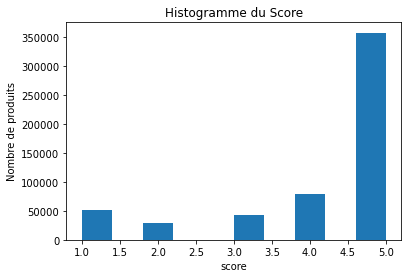

In [57]:
plt.hist(donnees["Score"])
plt.xlabel('score')
plt.ylabel('Nombre de produits')
plt.title('Histogramme du Score')

Text(0.5, 1.0, 'Histogramme du HelpfulnessNumerator')

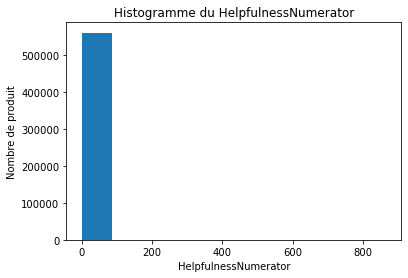

In [58]:
plt.hist(donnees["HelpfulnessNumerator"])
plt.xlabel('HelpfulnessNumerator')
plt.ylabel('Nombre de produit')
plt.title('Histogramme du HelpfulnessNumerator')

Le max du HelpfulnessNumerator est 866, sauf qu'il y en a très peu avec un HelpfulnessNumerator si grand. Donc si on prend les HelpfulnessNumerator entre 0 et 100 :

Text(0.5, 1.0, 'Histogramme du HelpfulnessNumerator')

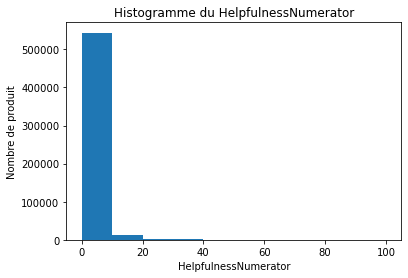

In [59]:
plt.hist(donnees["HelpfulnessNumerator"], range=(0,100))
plt.xlabel('HelpfulnessNumerator')
plt.ylabel('Nombre de produit')
plt.title('Histogramme du HelpfulnessNumerator')

Et entre 0 et 10 :

Text(0.5, 1.0, 'Histogramme du HelpfulnessNumerator')

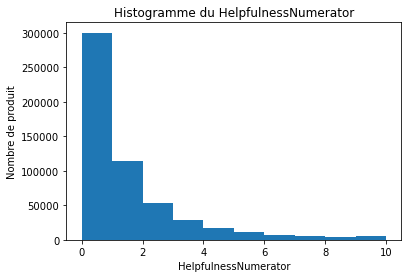

In [60]:
plt.hist(donnees["HelpfulnessNumerator"], range=(0,10))
plt.xlabel('HelpfulnessNumerator')
plt.ylabel('Nombre de produit')
plt.title('Histogramme du HelpfulnessNumerator')

Pareil pour HelpfulnessDenominator, le max est 923 :

Text(0.5, 1.0, 'Histogramme du HelpfulnessDenominator')

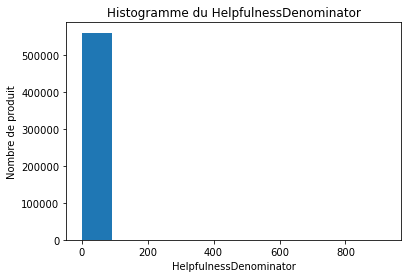

In [61]:
plt.hist(donnees["HelpfulnessDenominator"])
plt.xlabel('HelpfulnessDenominator')
plt.ylabel('Nombre de produit')
plt.title('Histogramme du HelpfulnessDenominator')

Text(0.5, 1.0, 'Histogramme du HelpfulnessDenominator ')

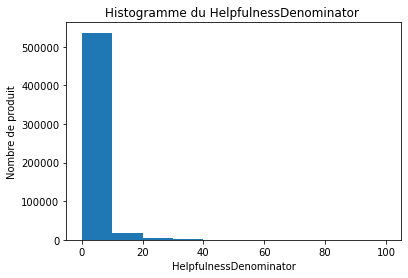

In [62]:
plt.hist(donnees["HelpfulnessDenominator"], range=(0,100))
plt.xlabel('HelpfulnessDenominator')
plt.ylabel('Nombre de produit')
plt.title('Histogramme du HelpfulnessDenominator ')

Text(0.5, 1.0, 'Histogramme du HelpfulnessDenominator ')

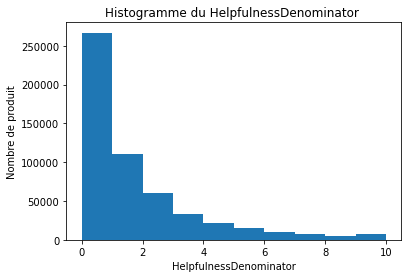

In [63]:
plt.hist(donnees["HelpfulnessDenominator"], range=(0,10))
plt.xlabel('HelpfulnessDenominator')
plt.ylabel('Nombre de produit')
plt.title('Histogramme du HelpfulnessDenominator ')